In [1]:
# header files
import os
import sys
import glob
import math
from skimage import data, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
print("Header files loaded!")

Header files loaded!


In [2]:
# DATA
# BRAIN PHANTOM Images: 256x256, 512x512, 1024x1024, 2048x2048, 4096x4096
# SL PHANTOM Images: 256x256, 512x512, 1024x1024, 2048x2048, 4096x4096

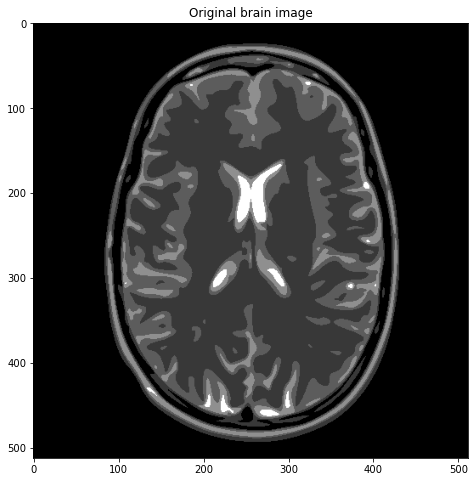

In [3]:
# view image
img_size = 512
FOV = 0.2
pixel_size = FOV/img_size

# load data file corresponding to the target resolution
mri_img = io.imread("../data/BrainPhantom512.png")

plt.figure()
plt.title("Brain Phantom, size = %s " % img_size)
if mri_img.ndim == 2:
    plt.imshow(mri_img, cmap=plt.cm.gray)
else:
    plt.imshow(mri_img)
plt.title("Original brain image")
plt.show()

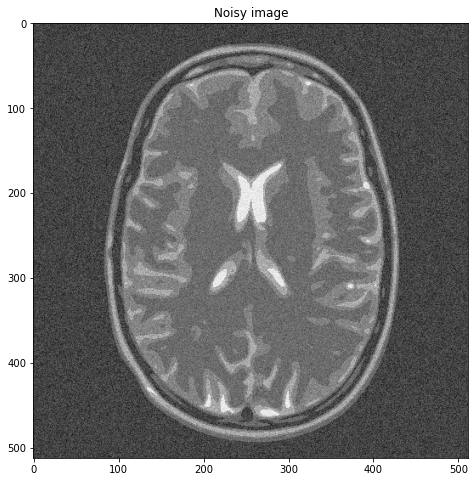

In [4]:
# noisy image
new_img = np.copy(mri_img.astype('float64'))
new_img += np.random.randn(*mri_img.shape) * 20.

if 1:
    plt.figure()
    plt.imshow(new_img, cmap='Greys_r')
    plt.title("Noisy image")
    plt.show()

In [5]:
# y = Fx + b
# x' = F'y

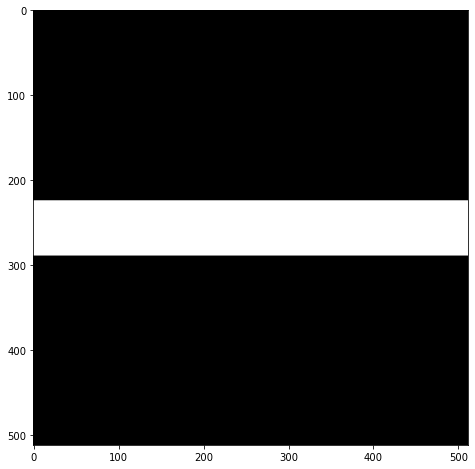

In [6]:
# Under-sampling 1
kspace_masklines = np.zeros((img_size,img_size), dtype="float64")
low_res_size = img_size // 8 + 1
idx_vec = np.linspace(img_size // 2 - low_res_size // 2, img_size // 2 + low_res_size // 2, low_res_size)
idx_vec_ =  idx_vec.astype("int")
kspace_masklines[idx_vec_, ] = 1

plt.imshow(kspace_masklines, cmap=plt.cm.gray)

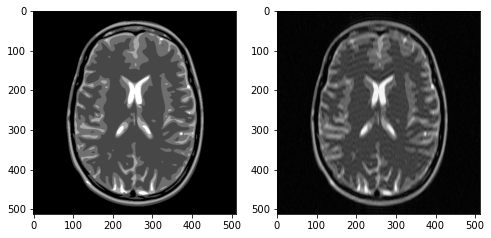

In [7]:
norm = "ortho"
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

kspace_data = np.fft.fftshift(fft(mri_img))
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
kspace_data *= kspace_masklines
image_rec0 = ifft(np.fft.ifftshift(kspace_data))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mri_img, cmap="Greys_r")
ax2.imshow(np.abs(image_rec0), cmap="Greys_r")

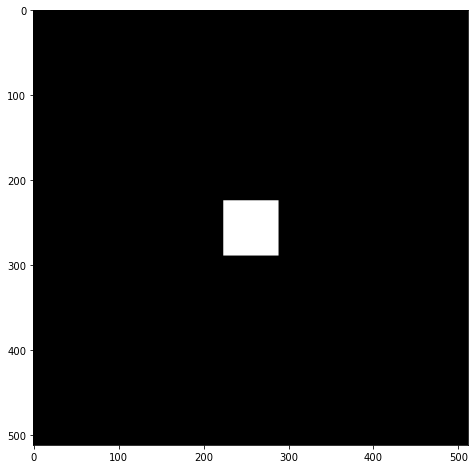

In [9]:
# Under-sampling 2
kspace_maskbox = np.zeros((img_size,img_size), dtype="float64")
kspace_maskbox[idx_vec_, ] = 1
list_img_size = np.arange(0., img_size).tolist()
filtered_center = [x for x in list_img_size if x not in idx_vec_]
array_idx_center = np.array(filtered_center)
array_idx_center_ = array_idx_center.astype("int")
kspace_maskbox[:, array_idx_center_] = 0

plt.imshow(kspace_maskbox, cmap=plt.cm.gray)

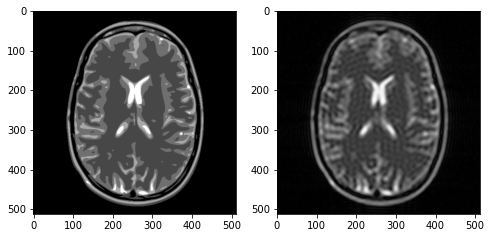

In [10]:
norm = "ortho"
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

kspace_data = np.fft.fftshift(fft(mri_img))
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
kspace_data *= kspace_maskbox
image_rec0 = ifft(np.fft.ifftshift(kspace_data))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mri_img, cmap="Greys_r")
ax2.imshow(np.abs(image_rec0), cmap="Greys_r")

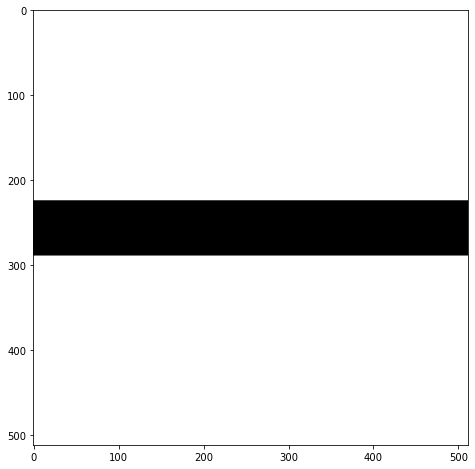

In [11]:
# Under-sampling 3
kspace_masklines = np.ones((img_size,img_size), dtype="float64")
low_res_size = img_size // 8 + 1
idx_vec = np.linspace(img_size // 2 - low_res_size // 2, img_size // 2 + low_res_size // 2, low_res_size)
idx_vec_ =  idx_vec.astype("int")
kspace_masklines[idx_vec_, ] = 0

plt.imshow(kspace_masklines, cmap=plt.cm.gray)

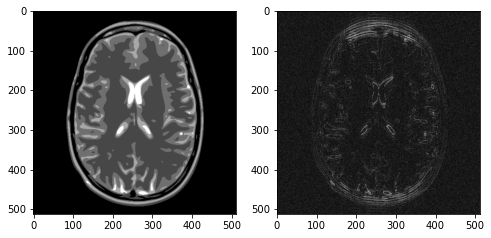

In [12]:
norm = "ortho"
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

kspace_data = np.fft.fftshift(fft(mri_img))
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
kspace_data *= kspace_masklines
image_rec0 = ifft(np.fft.ifftshift(kspace_data))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mri_img, cmap="Greys_r")
ax2.imshow(np.abs(image_rec0), cmap="Greys_r")

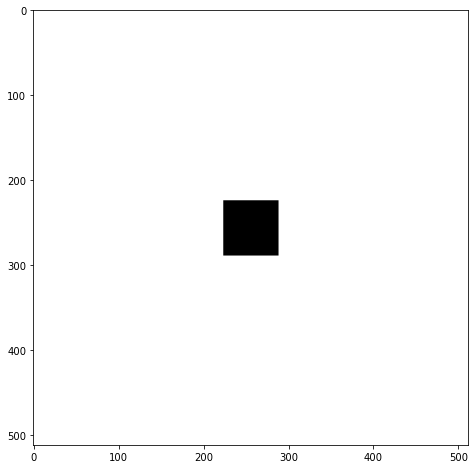

In [13]:
# Under-sampling 4
kspace_maskbox = np.ones((img_size,img_size), dtype="float64")
kspace_maskbox[idx_vec_, ] = 0
list_img_size = np.arange(0., img_size).tolist()
filtered_center = [x for x in list_img_size if x not in idx_vec_]
array_idx_center = np.array(filtered_center)
array_idx_center_ = array_idx_center.astype("int")
kspace_maskbox[:, array_idx_center_] = 1

plt.imshow(kspace_maskbox, cmap=plt.cm.gray)

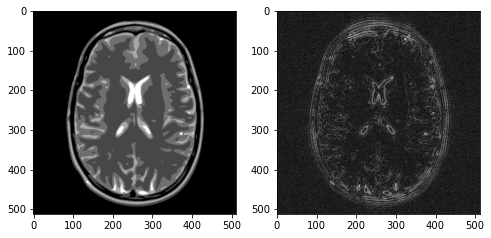

In [14]:
norm = "ortho"
def fft(x):
    return np.fft.fft2(x, norm=norm)

def ifft(x):
    return np.fft.ifft2(x, norm=norm)

kspace_data = np.fft.fftshift(fft(mri_img))
signoise = 10
kspace_data += np.random.randn(*mri_img.shape) * signoise * (1+1j)
kspace_data *= kspace_maskbox
image_rec0 = ifft(np.fft.ifftshift(kspace_data))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mri_img, cmap="Greys_r")
ax2.imshow(np.abs(image_rec0), cmap="Greys_r")